<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/FermiHubbard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://qiskit.org/documentation/nature/tutorials/10_lattice_models.html


In [1]:
!pip install qiskit-nature

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.6 MB/s 
     |████████████████████████████████| 1.6 MB 50.6 MB/s 
     |████████████████████████████████| 6.7 MB 44.7 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 37.2 MB/s 
     |████████████████████████████████| 112 kB 52.4 MB/s 


Checking Qiskit Version and then Implortiong all necessary modules

In [2]:
import qiskit

qiskit.__qiskit_version__


{'qiskit-terra': '0.21.2', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit': None, 'qiskit-nature': '0.4.4', 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from math import pi

import numpy as np
import retworkx as rx
from qiskit_nature.problems.second_quantization.lattice import (
    BoundaryCondition,
    FermiHubbardModel,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)

In [4]:
square_lattice = SquareLattice(rows=5, cols=4, boundary_condition=BoundaryCondition.PERIODIC)

t = -1.0  # the interaction parameter
v = 0.0  # the onsite potential
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel.uniform_parameters(
    lattice=square_lattice,
    uniform_interaction=t,
    uniform_onsite_potential=v,
    onsite_interaction=u,
)

In [5]:
ham = fhm.second_q_ops().simplify()
print(ham)

Fermionic Operator
register length=40, number terms=180
  (-1+0j) * ( +_0 -_2 )
+ (1+0j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_10 )
+ (1+0j) * ( -_0 +_10 )
+ (-1+0j) * ( +_10 -_12 )
+ (1+0j) * ( -_10 +_12 )
+ (-1+0j) * ( +_10 -_20 )
+ (1+0j) * ( -_10 +_20  ...


In [6]:
graph = rx.PyGraph(multigraph=False)  # multiigraph shoud be False
graph.add_nodes_from(range(6))
weighted_edge_list = [
    (0, 1, 1.0 + 1.0j),
    (0, 2, -1.0),
    (2, 3, 2.0),
    (4, 2, -1.0 + 2.0j),
    (4, 4, 3.0),
    (2, 5, -1.0),
]
graph.add_edges_from(weighted_edge_list)

general_lattice = Lattice(graph)  # the lattice whose weights are seen as the interaction matrix.
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel(lattice=general_lattice, onsite_interaction=u)

ham = fhm.second_q_ops().simplify()
ham.set_truncation(0)
print(ham)

Fermionic Operator
register length=12, number terms=28
  (1+1j) * ( +_0 -_2 )
+ (-1+1j) * ( -_0 +_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (1+0j) * ( -_0 +_4 )
+ (2+0j) * ( +_4 -_6 )
+ (-2+0j) * ( -_4 +_6 )
+ (-1-2j) * ( +_4 -_8 )
+ (1-2j) * ( -_4 +_8 )
+ (3+0j) * ( +_8 -_8 )
+ (-1+0j) * ( +_4 -_10 )
+ (1+0j) * ( -_4 +_10 )
+ (1+1j) * ( +_1 -_3 )
+ (-1+1j) * ( -_1 +_3 )
+ (-1+0j) * ( +_1 -_5 )
+ (1+0j) * ( -_1 +_5 )
+ (2+0j) * ( +_5 -_7 )
+ (-2+0j) * ( -_5 +_7 )
+ (-1-2j) * ( +_5 -_9 )
+ (1-2j) * ( -_5 +_9 )
+ (3+0j) * ( +_9 -_9 )
+ (-1+0j) * ( +_5 -_11 )
+ (1+0j) * ( -_5 +_11 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )
+ (5+0j) * ( +_6 -_6 +_7 -_7 )
+ (5+0j) * ( +_8 -_8 +_9 -_9 )
+ (5+0j) * ( +_10 -_10 +_11 -_11 )


In [7]:
from qiskit_nature.problems.second_quantization import LatticeModelProblem
from qiskit_nature.converters.second_quantization import QubitConverter

num_nodes = 4
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

fhm = FermiHubbardModel.uniform_parameters(
    lattice=line_lattice,
    uniform_interaction=t,
    uniform_onsite_potential=v,
    onsite_interaction=u,
)

lmp = LatticeModelProblem(lattice_model=fhm)

In [8]:
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit_nature.mappers.second_quantization import JordanWignerMapper

numpy_solver = NumPyMinimumEigensolver()

qubit_converter = QubitConverter(JordanWignerMapper())

calc = GroundStateEigensolver(qubit_converter, numpy_solver)
res = calc.solve(lmp)

print(res)

=== GROUND STATE ===
 
* Lattice ground state energy : -2.566350190841


/usr/local/lib/python3.7/dist-packages/qiskit_nature/algorithms/ground_state_solvers/ground_state_eigensolver.py:104: ListAuxOpsDeprecationWarning: List-based `aux_operators` are deprecated as of version 0.3.0 and support for them will be removed no sooner than 3 months after the release. Instead, use dict-based `aux_operators`. You can switch to the dict-based interface immediately, by setting `qiskit_nature.settings.dict_aux_operators` to `True`.
  second_q_ops = problem.second_q_ops()


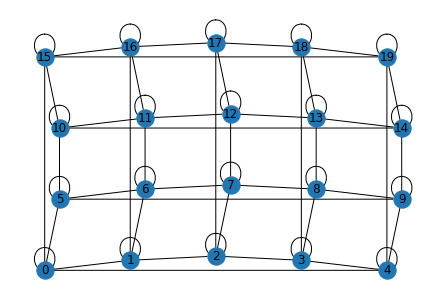

In [11]:
square_lattice.draw(self_loop=True, style=LatticeDrawStyle(with_labels=True))